In [1]:
import pandas as pd
import numpy as np
import glob
import os 
import seaborn as sb
import matplotlib.pyplot as plt

In [28]:
## 데스크 탑에서 얻은 주소 그대로 사용하는 방법 
##"C:\Users\since\Dropbox\Lab\Projects\CJY\Annotation\Rubrics\EB_results_secondary_analys9s.xlsx"
## mtcars = pd.read_csv(r"C:\pywork\mtcars.csv") 

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (684635892.py, line 1)

In [34]:
file_dir = glob.glob(os.path.join('/mnt/c/Users/since/Dropbox/Lab/Projects/CJY/Annotation/Rubrics'))
file = file_dir[0]
print(file)
visual_df = pd.read_excel(os.path.join(file,'EB_results_secondary_analys9s.xlsx'), sheet_name = 'visual_first', names = ['sub', 'R_visual_count','R_audio_count', 'R_change','N_visual_count','N_audio_count', 'N_change', 'D_visual_count','D_audio_count', 'D_change','B_visual_count','B_audio_count', 'B_change'])
audio_df = pd.read_excel(os.path.join(file,'EB_results_secondary_analys9s.xlsx'), sheet_name = 'audio_first', names = ['sub', 'R_visual_count','R_audio_count', 'R_change','N_visual_count','N_audio_count', 'N_change', 'D_visual_count','D_audio_count', 'D_change','B_visual_count','B_audio_count', 'B_change'])

/mnt/c/Users/since/Dropbox/Lab/Projects/CJY/Annotation/Rubrics


In [178]:
audio_df.drop(audio_df.index[8], axis=0, inplace=True)
audio_df

,sub,R_visual_count,R_audio_count,R_change,N_visual_count,N_audio_count,N_change,D_visual_count,D_audio_count,D_change,B_visual_count,B_audio_count,B_change,sequence
0,2,6,6,0,5,4,-1,7,4,-3,5,5,0,2
1,4,8,8,0,5,8,3,5,7,2,8,5,-3,2
2,6,5,7,2,4,7,3,3,5,2,7,6,-1,2
3,8,5,6,1,5,7,2,5,6,1,4,4,0,2
4,10,9,11,2,9,13,4,7,8,1,8,8,0,2
5,12,3,6,3,4,5,1,5,6,1,4,5,1,2
6,14,6,5,-1,5,4,-1,3,3,0,5,7,2,2
7,16,12,11,-1,8,9,1,10,8,-2,10,5,-5,2
9,20,5,5,0,7,4,-3,5,5,0,6,6,0,2


# Box Plot

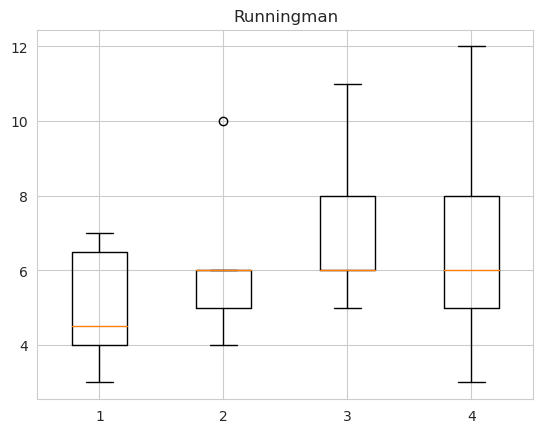

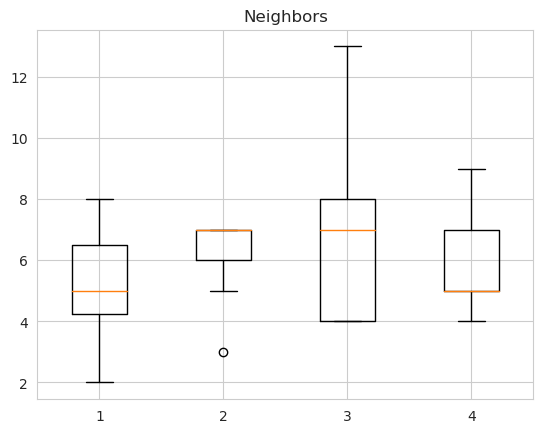

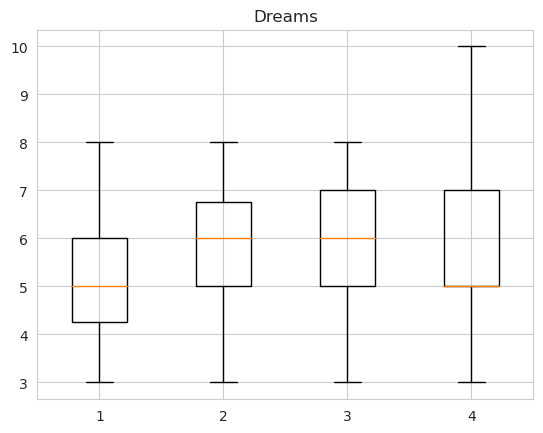

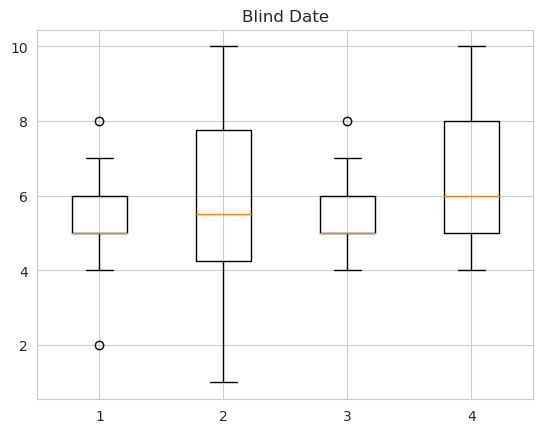

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

visual_cond = { 'R': 'R_visual_count', 'N': 'N_visual_count' , 'D': 'D_visual_count', 'B':'B_visual_count'}
audio_cond = { 'R': 'R_audio_count', 'N': 'N_audio_count' , 'D': 'D_audio_count', 'B':'B_audio_count'}
story_names = {'R': 'Runningman', 'N': 'Neighbors', 'D': 'Dreams', 'B': 'Blind Date'}

for cond in ['R', 'N', 'D', 'B']:
    group1 = visual_df[visual_cond[cond]]
    group2= visual_df[audio_cond[cond]]
    group3= audio_df[audio_cond[cond]]
    group4 = audio_df[visual_cond[cond]]
    
    plot_data = [group1, group2, group3, group4]
    plt.boxplot(plot_data)
    plt.title(story_names[cond])
    plt.show()


# 이원배치 분산분석 (Two-way ANOVA) 
- 독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용
- 상호작용효과(Interaction effect), 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용
 

In [47]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [183]:
# make a design matrix .. .
Vv_group = {}
Va_group = {} 
Aa_group = {}
Av_group = {} 
concat_data = {}

for cond in ['R', 'N', 'D', 'B']:
    group1 = pd.DataFrame() 
    group2 = pd.DataFrame() 
    group3 = pd.DataFrame() 
    group4 = pd.DataFrame() 
    
    group1['Event_Num'] = visual_df[visual_cond[cond]] # visual first * lst encode v
    group1['id'] = visual_df['sub']
    group1['sequence'] = [1,1,1,1,1,1,1,1,1,1] #visual first 
    group1['stimulus'] = [1,1,1,1,1,1,1,1,1,1]
    
    group2['Event_Num'] = visual_df[audio_cond[cond]] # visual first * 2nd encode a
    group2['id'] = visual_df['sub']
    group2['sequence'] = [1,1,1,1,1,1,1,1,1,1] 
    group2['stimulus'] = [2,2,2,2,2,2,2,2,2,2] #audio
    
    group3['Event_Num'] = audio_df[visual_cond[cond]] # audio first *lst encode a
    group3['id'] = audio_df['sub']
    group3['sequence'] = [2,2,2,2,2,2,2,2,2] #audio first 
    group3['stimulus'] = [1,1,1,1,1,1,1,1,1] #audio
    
    group4['Event_Num']  = audio_df[audio_cond[cond]] # audio first *2nd encode v 
    group4['id'] = audio_df['sub']
    group4['sequence'] = [2,2,2,2,2,2,2,2,2]
    group4['stimulus'] = [2,2,2,2,2,2,2,2,2]
    
    concat_data[cond] = pd.concat([group1, group2, group3, group4], axis = 0)
    
    Vv_group[cond] = pd.DataFrame(group1)
    Va_group[cond] = pd.DataFrame(group2)
    Aa_group[cond] = pd.DataFrame(group3)
    Av_group[cond] = pd.DataFrame(group4)

In [184]:
twoes =2 * np.ones(40)
threes = 3 *np.ones(40)
four = 4 * np.ones(40)

In [188]:
concat_data['R'].shape
concat_data['R']['story'] = np.ones(38)
concat_data['N']['story'] = 2*np.ones(38)
concat_data['D']['story'] = 3*np.ones(38)
concat_data['B']['story'] = 4*np.ones(38)

concat_all_datas = pd.concat([concat_data['R'], concat_data['N'], concat_data['D'], concat_data['B']], axis = 0)


In [189]:
concat_all_datas

,Event_Num,id,sequence,stimulus,story
0,5,1,1,1,1.0
1,4,3,1,1,1.0
2,7,5,1,1,1.0
3,4,7,1,1,1.0
4,5,9,1,1,1.0
...,...,...,...,...,...
4,8,10,2,2,4.0
5,5,12,2,2,4.0
6,7,14,2,2,4.0
7,5,16,2,2,4.0


In [92]:
formula = 'Event_Num ~ C(sequence)+C(stimulus)+C(sequence):C(stimulus)'
model = ols(formula, concat_all_datas).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(sequence),1.0,1.80625,1.806250,0.403675,0.526128
C(stimulus),1.0,9.50625,9.506250,2.124530,0.146967
C(sequence):C(stimulus),1.0,2.75625,2.756250,0.615988,0.433732
Residual,156.0,698.02500,4.474519,NaN,NaN


In [96]:
for cond in ['R', 'N', 'D', 'B']:
    formula = 'Event_Num ~ C(sequence)+C(stimulus)+C(sequence):C(stimulus)'
    model = ols(formula, concat_data[cond]).fit()
    print(story_names[cond])
    print(anova_lm(model))

Runningman
                           df  sum_sq    mean_sq         F    PR(>F)
C(sequence)               1.0    10.0  10.000000  1.993355  0.166576
C(stimulus)               1.0     4.9   4.900000  0.976744  0.329600
C(sequence):C(stimulus)   1.0     0.4   0.400000  0.079734  0.779275
Residual                 36.0   180.6   5.016667       NaN       NaN
Neighbors
                           df   sum_sq   mean_sq         F    PR(>F)
C(sequence)               1.0    0.225  0.225000  0.043713  0.835567
C(stimulus)               1.0    7.225  7.225000  1.403670  0.243873
C(sequence):C(stimulus)   1.0    0.225  0.225000  0.043713  0.835567
Residual                 36.0  185.300  5.147222       NaN       NaN
Dreams
                           df  sum_sq  mean_sq         F    PR(>F)
C(sequence)               1.0     0.9     0.90  0.227848  0.636009
C(stimulus)               1.0     1.6     1.60  0.405063  0.528512
C(sequence):C(stimulus)   1.0     0.4     0.40  0.101266  0.752155
Residual      

In [107]:
concat_data[cond]

,Event_Num,id,sequence,stimulus,story
0,5,1,1,1,4.0
1,5,3,1,1,4.0
2,6,5,1,1,4.0
3,4,7,1,1,4.0
4,8,9,1,1,4.0
5,5,11,1,1,4.0
6,7,13,1,1,4.0
7,5,15,1,1,4.0
8,2,17,1,1,4.0
9,6,19,1,1,4.0


# Mixed_design ANOVA 

In [190]:
# Mixed_design ANOVA with 펭귄
    
    
import pingouin as pg
for cond in ['R', 'N', 'D', 'B']:
    # Compute the 2-way repeated measures ANOVA. This will return a dataframe.
    #result = pg.rm_anova(dv='Event_Num', within=['stimulus'], subject='id', data=concat_data[cond])
    result = pg.mixed_anova(dv='Event_Num', between='sequence', within='stimulus', subject='id', data=concat_data[cond])
    print(story_names[cond])
    print(result)
    print('                                                                       ')
    # Optional post-hoc tests
    # pg.pairwise_ttests(dv='dv', within=['iv1', 'iv2'], subject='id', data=df)
    
# Reference: https://pingouin-stats.org/build/html/generated/pingouin.mixed_anova.html#pingouin.mixed_anova

Runningman
        Source         SS  DF1  DF2         MS         F     p-unc       np2  \
0     sequence  19.614327    1   17  19.614327  2.641602  0.122492  0.134490   
1     stimulus   5.921053    1   17   5.921053  5.455712  0.032013  0.242954   
2  Interaction   0.128947    1   17   0.128947  0.118813  0.734553  0.006941   

   eps  
0  NaN  
1  1.0  
2  NaN  
                                                                       
Neighbors
        Source            SS  DF1  DF2            MS             F     p-unc  \
0     sequence  3.162573e+00    1   17  3.162573e+00  4.506181e-01  0.511061   
1     stimulus  9.500000e+00    1   17  9.500000e+00  5.568966e+00  0.030499   
2  Interaction  5.684342e-14    1   17  5.684342e-14  3.332200e-14  1.000000   

            np2  eps  
0  2.582247e-02  NaN  
1  2.467532e-01  1.0  
2  1.960118e-15  NaN  
                                                                       
Dreams
        Source        SS  DF1  DF2        MS         F    

In [191]:
# Mixed_design ANOVA with 펭귄
    
    
import pingouin as pg
pg.mixed_anova(dv='Event_Num', between='sequence', within='stimulus', subject='id', data=concat_all_datas)


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,sequence,4.105921,1,17,4.105921,1.076755,0.313960,0.059566,NaN
1,stimulus,2.764803,1,17,2.764803,4.302757,0.053552,0.201981,1.0
2,Interaction,0.467836,1,17,0.467836,0.728076,0.405370,0.041069,NaN


Text(0.5, 1.0, 'Blind Date')

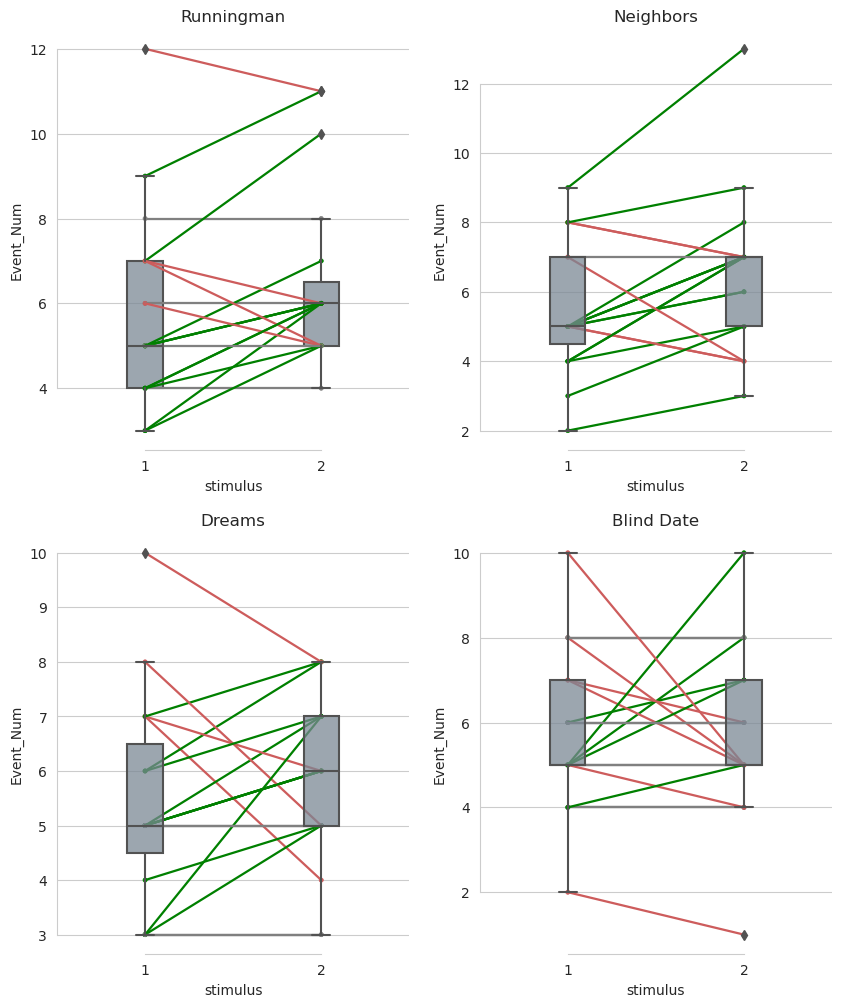

In [192]:
# Plotting mixed_anova 
import pingouin as pg
fig, axs = plt.subplots(2,2, figsize = (10,12))
#for pos,cond in enumerate([, 'N', 'D', 'B']):
pg.plot_paired(data=concat_data['R'], dv='Event_Num', within='stimulus', subject='id',  ax = axs[0,0])
axs[0,0].set_title('Runningman')
pg.plot_paired(data=concat_data['N'], dv='Event_Num', within='stimulus', subject='id', boxplot_in_front=True, ax = axs[0,1])
axs[0,1].set_title('Neighbors')
pg.plot_paired(data=concat_data['D'], dv='Event_Num', within='stimulus', subject='id', boxplot_in_front=True, ax = axs[1,0])
axs[1,0].set_title('Dreams')
pg.plot_paired(data=concat_data['B'], dv='Event_Num', within='stimulus', subject='id', boxplot_in_front=True, ax = axs[1,1])
axs[1,1].set_title('Blind Date')

# Reference :https://pingouin-stats.org/build/html/generated/pingouin.plot_paired.html#pingouin.plot_paired

In [29]:
import numpy as np
from scipy import stats

In [37]:
## sample data-set 
v_first_1 ={} 
v_first_2 ={} 
a_first_1 = {}
a_first_2 = {} 

v_first_1 = visual_df['R_visual_count']
v_first_2 = visual_df['R_audio_count']
a_first_1 = audio_df['R_audio_count']
a_first_2 = audio_df['R_visual_count']

In [40]:
## paired t-test using Python scipy module
# H0: no difference before and after)
# H1: manipulation is effective (i.e., there is difference before and after)
stat, p_val = stats.ttest_rel(v_first_1, v_first_2, alternative='greater')
print('statistic for Runningman:', stat, '   p-value:', p_val)
# statistic: 3.550688262985491    p-value: 0.003104595950799298

statistic for Runningman: -1.8676290524384016    p-value: 0.9526721470857815


In [25]:
all_df = pd.concat([visual_df,audio_df])

In [26]:
all_df

,sub,R_visual_count,R_audio_count,R_change,N_visual_count,N_audio_count,N_change,D_visual_count,D_audio_count,D_change,B_visual_count,B_audio_count,B_change
0,1,5,6,-1,5,6,-1,5,6,-1,5,5,0
1,3,4,4,0,2,3,-1,3,3,0,5,8,-3
2,5,7,10,-3,7,7,0,5,6,-1,6,7,-1
3,7,4,6,-2,5,6,-1,6,8,-2,4,4,0
4,9,5,6,-1,8,7,1,7,6,1,8,8,0
5,11,7,6,1,8,7,1,8,5,3,5,4,1
6,13,7,5,2,5,7,-2,3,7,-4,7,5,2
7,15,4,6,-2,3,5,-2,5,5,0,5,10,-5
8,17,3,5,-2,5,7,-2,6,7,-1,2,1,1
9,19,4,5,-1,4,7,-3,4,5,-1,6,6,0
